HR Analytics: Data Science Job Market
========

$\color{grey}{\text{28/02/2021 - Ward Ali Dib}}$

Analysing and understanding data is as old as maths itself, and has been discussed by scientists, statisticians, computer scientists, and others, for many years. While the "Big Data" industry is relatively new, it's a rapidly growing field with plenty of opportunities, and the demand for data scientists keeps increasing by the day. 

This dataset contains information about 19000 data scientists, including their education history, job prospects, and whether they are looking for new jobs or not. This report will dissect the dataset and provide a summary of its features, trends, and investigate factors that might cause a data scientist to look for a new job. 

The information is dummy data created by Möbius on Kaggle. [1] 

### Features of the dataset:

- enrollee_id : Unique ID for candidate

- city: City code

- city_ development _index : Developement index of the city (scaled)

- gender: Gender of candidate

- relevent_experience: Relevant experience of candidate

- enrolled_university: Type of University course enrolled if any

- education_level: Education level of candidate

- major_discipline :Education major discipline of candidate

- experience: Candidate total experience in years

- company_size: No of employees in current employer's company

- company_type : Type of current employer

- lastnewjob: Difference in years between previous job and current job

- training_hours: training hours completed

- target: 0 – Not looking for job change, 1 – Looking for a job change

### Reading and cleaning the data:

We will start by importing the libraries needed, then importing the dataset and checking for missing values. The missing values will then be removed before carrying out any statistical analysis.

In [1]:
# Import libraries.
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()
import pandas as pd

In [2]:
# Read the dataframe using pandas.
df = pd.read_csv('/Users/warda/Desktop/wrd/Uni/MSc/SEM 2/Data Handling/Assignment 1/data.csv')
# df.head()
print(df.shape)

(19158, 14)


In [3]:
# Find the total count of missing values.
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline             0
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [4]:
# remove all missing data
ds = df.dropna()

# Summary statistics for the new data.
print(ds.shape)
ds.head()

(9615, 14)


,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,20.0,50-99,Funded Startup,4,8,0
6,28806,city_160,0.920,Male,Has relevent experience,no_enrollment,High School,No Major,5.0,50-99,Funded Startup,1,24,0
7,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,>4,18,1
8,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,1,46,1




### Statistics of the job market:

Now that the data is clean, we can take a look at what the data science job market looks like by asking relevant questions. The key information for employers is education level and years of experience.

#### _1. What is the average number of experience years for data scientists in this dataset?_


In [5]:
print("Mean years of experience: ", ds.experience.mean())
print("Minimum years of experience: ", ds.experience.min())
print("Maximum years of experience: ", ds.experience.max())
print("Standard deviation of years of experience: ", ds.experience.std())
print("Number of data scientists with 1 year of experience: ", np.sum(ds.experience == 1))
print("Number of data scientists with more than 11 years of experience: ", np.sum(ds.experience >= 11))
print("Number of data scientists less than 11 years of experience: ", np.sum(ds.experience < 11))

Mean years of experience:  11.269058762350493
Minimum years of experience:  1.0
Maximum years of experience:  20.0
Standard deviation of years of experience:  6.253178471849902
Number of data scientists with 1 year of experience:  251
Number of data scientists with more than 11 years of experience:  4687
Number of data scientists less than 11 years of experience:  4928


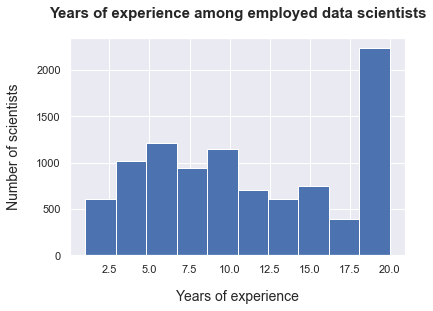

In [6]:
# plot experince distrubution
plt.hist(ds.experience)
plt.title('Years of experience among employed data scientists', weight = 'bold', fontsize = 15, pad = 20)
plt.xlabel('Years of experience', fontsize = 14, labelpad = 15)
plt.ylabel('Number of scientists', fontsize = 14, labelpad = 15);


We can see that the average number of experience years of employed data scientists is around 11 years.
There's an almost even split between the number of scientists with more and less than average years of experience. This shows longevity and suggests it's a career path where people tend to stay employed in similar positions for long periods of time.


#### _2. Education, discipline, and gender in data science - what kind of people become data scientists?_

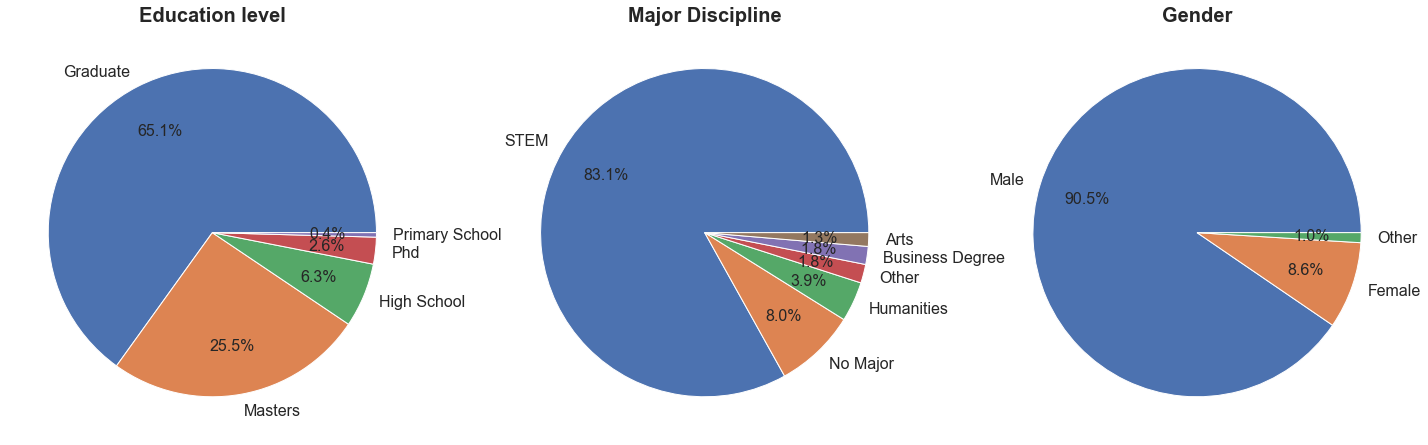

In [7]:
# Plotting pie charts.
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (25, 25))

x = ds['education_level'].value_counts().rename_axis('education_level').reset_index(name = 'education')
y = ds['major_discipline'].value_counts().rename_axis('major_discipline').reset_index(name = 'major')
z = ds['gender'].value_counts().rename_axis('gender').reset_index(name = 'sex')

ax[0].pie(x.education, startangle = 0, autopct = '%.1f%%', labels = x.education_level, pctdistance = 0.7,
                                   textprops = {'fontsize': 16})
ax[0].set_title('Education level', weight = 'bold', fontsize = 20)

ax[1].pie(y.major, startangle = 0, autopct = '%.1f%%', labels = y.major_discipline, pctdistance = 0.7,
                                   textprops = {'fontsize': 16})
ax[1].set_title('Major Discipline', weight = 'bold', fontsize = 20) 

ax[2].pie(z.sex, startangle = 0, autopct = '%.1f%%', labels = z.gender, pctdistance = 0.7,
                                   textprops={'fontsize': 16})
ax[2].set_title('Gender', weight = 'bold', fontsize = 20) 

plt.show();

In [8]:
# Gender in numbers.
ds['gender'].value_counts()

Male      8698
Female     823
Other       94
Name: gender, dtype: int64

From the information above, we can see that the ovewhelming majority of data scientists are men, STEM majors, and people with higher education degrees. It's not the most diverse field - however there are some interesting entries of data scientists with no university education or non-STEM backgrounds such as humanities or arts.

#### _3. Who hires the most data scientists?_


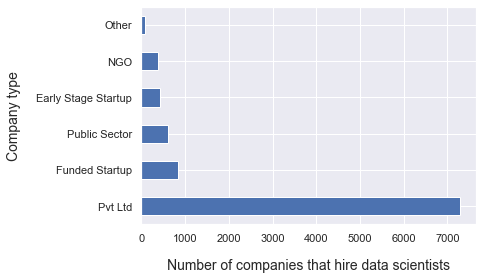

In [9]:
# Number of different companies that employ data scientists.
plt.xlabel('Number of companies that hire data scientists', fontsize = 14, labelpad = 15)
plt.ylabel('Company type', fontsize = 14, labelpad = 15)
ds['company_type'].value_counts().plot(kind = 'barh');

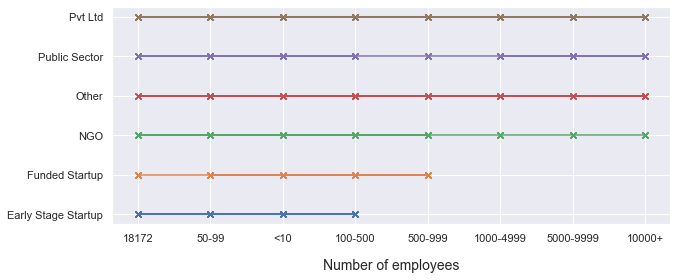

In [10]:
# Different company types and their sizes.
grpd = ds.groupby('company_type')
plt.figure(figsize = (10, 4))
for name, data in grpd:
    plt.plot(data.company_size.values, data.company_type.values, 'x-', label = name)
    plt.xlabel('Number of employees', fontsize = 14, labelpad = 15)
plt.show();

The graph shows that the most dominant force in the industry is private companies. They have the most varied range of employee numbers; they could be a small company with 10 employees or a huge one with over 10,000 employees. While they share this charactaristic with other company types such as the public sector, private companies still hold the top spot for hiring the most data scientists.

#### _4. City development and data science - is there a job market for data science in less developed cities?_

In [11]:
# City development and the data science sector.
print("Mean city development: ", ds.city_development_index.mean())
print("Minimum city development: ", ds.city_development_index.min())
print("Maximum city development: ", ds.city_development_index.max())
print("Median city development: ", ds.city_development_index.median())
print("Standard deviation of city development: ", ds.city_development_index.std())
print("Number of cities with more than 0.8 on the CDI scale: ", np.sum(ds.city_development_index > 0.8))
print("Number of cities with less than 0.8 on the CDI scale: ", np.sum(ds.city_development_index < 0.8))

Mean city development:  0.8468892355694253
Minimum city development:  0.44799999999999995
Maximum city development:  0.9490000000000001
Median city development:  0.91
Standard deviation of city development:  0.11425950350604332
Number of cities with more than 0.8 on the CDI scale:  7258
Number of cities with less than 0.8 on the CDI scale:  2357


[39 38 46 ... 46 46 40]
[0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 4.000e+00 0.000e+00 4.000e+00 2.000e+00 4.200e+01 9.600e+01
 5.100e+01 5.400e+01 0.000e+00 1.119e+03 1.800e+01 6.800e+01 8.300e+01
 2.320e+02 4.100e+01 2.620e+02 1.520e+02 1.210e+02 2.330e+02 1.520e+02
 3.180e+02 6.300e+01 9.010e+02 1.208e+03 4.050e+03 3.410e+02 0.000e+00
 0.000e+00]


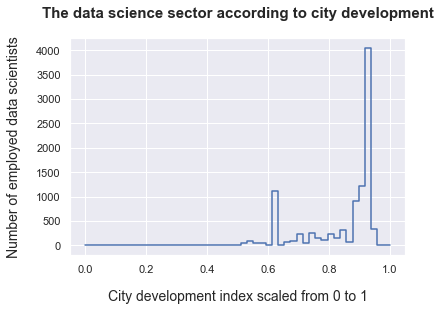

In [12]:
x = ds.city_development_index
x;
bins = np.linspace(0, 1)
counts = np.zeros_like(bins)
(bins, counts)

# Finding the appropriate bin for each x
i = np.searchsorted(bins, x) # finding indices where elements should be inserted to maintain order.
print(i)

# Adding 1 to each of these bins
np.add.at(counts, i, 1)
print(counts)
plt.xlabel('City development index scaled from 0 to 1', fontsize = 14, labelpad = 15)
plt.ylabel('Number of employed data scientists', fontsize = 14, labelpad = 15)
plt.title('The data science sector according to city development', weight = 'bold', fontsize = 15, pad = 20)
plt.plot(bins, counts, drawstyle = 'steps');

From the summaries and the historgram above, we see that the majority of data scientists are employed in cities that scored high on the city development index. This could be due to many factors, such as: a higher salary, more vacancies, and the prevalence of private companies - which we know employ the most data scientists as we saw in the previous section. However, there are still many data scientists employed in less developed cities.


### Relations between features and employability:

Next, we'll split the data into two subsets of opposing features using Masks and Boolean operators, then see if the there's a noticable influence of these factors on data scientists' decision to look for new employment. 

#### _5. Does city development affect employees dicision to look for new jobs?_

In [13]:
# Split data into developed (above the average value) and under developed (under the average value).
# Construct a mask of all developed cities.
developed = (ds.city_development_index >= 0.85)

# Stats for developed cities
print("Number of data scientists looking for new jobs: ", np.sum(ds.target[developed] == 1))
print("Number of data scientists not looking for new jobs: ", np.sum(ds.target[developed] == 0))

print("Number of data scientists with different degrees: ")
print(ds.education_level[developed].value_counts())

print("Mean number of experience years in developed cities: ", np.mean(ds.experience[developed]))
print("Mean number of training hours in developed cities: ", np.mean(ds.training_hours[developed]))

Number of data scientists looking for new jobs:  580
Number of data scientists not looking for new jobs:  6201
Number of data scientists with different degrees: 
Graduate          4287
Masters           1754
High School        484
Phd                224
Primary School      32
Name: education_level, dtype: int64
Mean number of experience years in developed cities:  12.349358501695916
Mean number of training hours in developed cities:  65.24303200117977


In [14]:
a = 580/(580+6201)*100
print("Percentage of employees looking for a new job: ", round(a, 2), "%")

Percentage of employees looking for a new job:  8.55 %


In [15]:
# Construct a mask of all under developed cities.
under_developed = (ds.city_development_index < 0.8)

# Stats for under developed cities.
print("Number of data scientists looking for new jobs: ", np.sum(ds.target[under_developed] == 1))
print("Number of data scientists not looking for new jobs: ", np.sum(ds.target[under_developed] == 0))

print("Number of data scientists with different degrees: ")
print(ds.education_level[under_developed].value_counts())

print("Mean number of experience years in under developed cities: ", np.mean(ds.experience[under_developed]))
print("Mean number of training hours in under developed cities: ", np.mean(ds.training_hours[under_developed]))

Number of data scientists looking for new jobs:  926
Number of data scientists not looking for new jobs:  1431
Number of data scientists with different degrees: 
Graduate          1702
Masters            552
High School         81
Phd                 16
Primary School       6
Name: education_level, dtype: int64
Mean number of experience years in under developed cities:  8.120067882901994
Mean number of training hours in under developed cities:  65.55366991938905


In [16]:
b = 926/(926+1431)*100
print("Percentage of employees looking for a new job: ", round(b, 2), "%")

Percentage of employees looking for a new job:  39.29 %


From the results above, we can conclude that data scientists in developed cities are less likely to look for a job change. The number of data scientists looking for new jobs in developed cities is only 580, or around 8.55% of the large sample size. This is a stark contrast to the much smaller sample size of less developed cities where 926 data scientists, or around 39.29%, are looking for new employment.

#### _6.The job market: who is looking for a new job?_

In [17]:
print("Number of data scientists not looking for job change: ", np.sum(ds.target == 0))
print("Number of data scientists looking for job change: ", np.sum(ds.target != 0))

Number of data scientists not looking for job change:  8061
Number of data scientists looking for job change:  1554


In [18]:
# Split the dataset into looking for a new job, and not looking using masks.
looking = (ds.target == 1)
not_looking = (ds.target == 0)

In [19]:
# Stats for employees looking for a job change
print("Mean number of experience years: ", np.mean(ds.experience[looking]))
print("Mean number of training hourss: ", np.mean(ds.training_hours[looking]))

print("Number of data scientists looking for a new job from different companies: ")
print(ds.company_type[looking].value_counts())

print("Number of previous jobs: ")
print(ds.last_new_job[looking].value_counts())

Mean number of experience years:  8.612612612612613
Mean number of training hourss:  63.5997425997426
Number of data scientists looking for a new job from different companies: 
Pvt Ltd                1174
Funded Startup          113
Public Sector           106
Early Stage Startup      87
NGO                      58
Other                    16
Name: company_type, dtype: int64
Number of previous jobs: 
1        719
2        290
>4       233
4        106
3        105
never    101
Name: last_new_job, dtype: int64


In [20]:
# Stats for employees not looking for a job.
print("Mean number of experience years: ", np.mean(ds.experience[not_looking]))
print("Mean number of training hourss: ", np.mean(ds.training_hours[not_looking]))

Mean number of experience years:  11.781168589505024
Mean number of training hourss:  65.49125418682546


The numbers above show that data scientists with less experience years than the average of 11 years are more likely to look for new jobs, while most employees with over 11 years of experience fall into the "not looking" catagory. This could be due to them holding more senior positions, or a general satisfaction in their workplace.

#### _7. The gender split in data science; does it affect employee prospects?_

In [21]:
# Duplicating the dataset to change the gender.
ds1 = ds.copy()

In [22]:
# Creating a dictionary file.
gender = {'Male': 1, 'Female': 2, 'Other': 3}
ds1.gender = [gender[item] for item in ds.gender]

In [23]:
# We'll split the set into men, women, and other, using the dictionary annotations set above.

men = (ds1.gender == 1)
women = (ds1.gender == 2)
other = (ds1.gender == 3)

In [24]:
# Stats for men.

print("Mean experience years of male data scientists: ", np.mean(ds1.experience[men]))
print("Mean training hours for male data scientists: ", np.mean(ds1.training_hours[men]))

Mean experience years of male data scientists:  11.426419866636008
Mean training hours for male data scientists:  65.08634168774431


In [25]:
# Stats for women.

print("Mean experience years of female data scientists: ", np.mean(ds1.experience[women]))
print("Mean training hours for female data scientists: ", np.mean(ds1.training_hours[women]))

Mean experience years of female data scientists:  9.68408262454435
Mean training hours for female data scientists:  66.77399756986634


In [26]:
# Stats for other.

print("Mean experience years of other data scientists: ", np.mean(ds1.experience[other]))
print("Mean training hours for other data scientists: ", np.mean(ds1.training_hours[other]))

Mean experience years of other data scientists:  10.585106382978724
Mean training hours for other data scientists:  60.45744680851064


The numbers above show a close split between the genders of data scientists and their experience. Women appear to train for the longest hours but have a little less experience on average. It could be due to the smaller sample size compared to men.

### Conclusion:

As technology advances, the demand for gathering, organising, and understanding large amounts of data during everyday company operations continues to increase. From marketing to tackling plastic pollution, data science offers many career oppurtunities across a large spectrum of industries. [2]

Reflecting on the dataset analysed in this report, we can see that the field is still largely dominated by male STEM graduates, and more job opportunities can be found in more developed cities. However, people from other backgrounds can still find a place in the industry. In terms of longevitiy, it is a life long career with high prospects. Only 16% of employed scientists surveyed in this dataset are looking for new jobs, and stability seems to come with more years of experience. 

### References:

1. 1. HR Analytics: Job Change of Data Scientists [Internet]. kaggle.com. [cited 2021 Feb 28]. Available from: https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists

2. Resources H, America N. What’s Driving the Demand for Data Scientists? [Internet]. Knowledge@Wharton. 8AD. Available from: https://knowledge.wharton.upenn.edu/article/whats-driving-demand-data-scientist/